In [ ]:
# !pip install video-representations-extractor==1.12.2 -U --no-cache
# !ls /usr/local/lib/python3.11/dist-packages/vre_repository/semantic_segmentation/mask2former/mask2former_impl/resources

In [ ]:
from pathlib import Path
import os
import urllib
os.environ["VRE_LOGLEVEL"] = "0"
from pprint import pprint
import subprocess
import numpy as np
import torch as tr
import matplotlib.pyplot as plt
import subprocess
import shutil

from vre.representations import build_representations_from_cfg, ReprOut, Representation
from vre.readers.multitask_dataset import MultiTaskDataset, MultiTaskItem
from vre.utils import collage_fn, image_add_title, MemoryData
from vre_repository import get_vre_repository

from pathlib import Path
import urllib
import sys
sys.path.append("examples/semantic_mapper")
urllib.request.urlretrieve("https://gitlab.com/video-representations-extractor/video-representations-extractor/-/raw/master/examples/semantic_mapper/semantic_mapper.py", filename="semantic_mapper.py")
urllib.request.urlretrieve("https://gitlab.com/video-representations-extractor/video-representations-extractor/-/raw/master/examples/semantic_mapper/cfg.yaml", filename="cfg.yaml")
from semantic_mapper import get_new_semantic_mapped_tasks

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
video_path = Path("test_video.mp4")
video_url = "https://gitlab.com/video-representations-extractor/video-representations-extractor/-/raw/master/resources/test_video.mp4"
if True: # Chance this if you don't want to download the movie every time
    shutil.rmtree(video_path, ignore_errors=True)
if not Path(video_path).exists(): # download a new one and change it to your liking
    urllib.request.urlretrieve(video_url, filename=str(video_path))

cfg_path = Path("cfg.yaml")
vre_dir = Path(f"data_{video_path.name}")
# frames = ["1", "100", "1000", "3000"]
# frames = [str(x) for x in np.random.randint(0, 5000, size=(3, ))]
frames = ["3420", "3891", "1947"]
vre_device = "cuda" if tr.cuda.is_available() else "cpu"
print(vre_device)
# if vre_dir.exists():
#     shutil.rmtree(vre_dir)
args = ["vre", str(video_path), "--config_path", str(cfg_path), "-o", str(vre_dir),
        "--frames", *frames, "--output_dir_exists_mode", "skip_computed"]
print(f"Running: {' '.join(args)}")
res = subprocess.run(args=args, env={**os.environ.copy(), **{"VRE_DEVICE": vre_device}}, capture_output=True, text=True)
if res.returncode != 0:
    print("============")
    print(res.stderr)
    print("============")
    print(res.stderr)


cuda
Running: vre test_video.mp4 --config_path cfg.yaml -o data_test_video.mp4 --frames 3420 3891 1947 --output_dir_exists_mode skip_computed


[2025-04-25T15:43:57 VRE-INFO] Building 'depth/marigold' (vre name: depth_marigold) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15:43:57 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_mapillary_49189528_1) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15:43:57 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_coco_47429163_0) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15:43:57 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_mapillary_49189528_0) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15:43:57 VRE-INFO] Building 'optical-flow/rife' (vre name: opticalflow_rife) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15:43:57 VRE-INFO] Building 'color/rgb' (vre name: rgb) (build_representations.py:build_representation_from_cfg:44)
[2025-04-25T15

[2025-04-25T15:43:58 VRE-INFO] Tasks used in this dataset: ['depth_marigold', 'normals_svd(depth_marigold)', 'opticalflow_rife', 'rgb', 'semantic_mask2former_coco_47429163_0', 'semantic_mask2former_mapillary_49189528_0'] (multitask_dataset.py:__init__:91)


[MultiTaskDataset]
 - Path: '/home/mihai/code/ml/video-representations-extractor/examples/vre_showcase/data_test_video.mp4'
 - Tasks (6): [Marigold(depth_marigold ['depth_marigold']), DepthNormalsSVD(normals_svd(depth_marigold) ['normals_svd(depth_marigold)']), FlowRife(opticalflow_rife ['opticalflow_rife']), RGB(rgb ['rgb']), Mask2Former(semantic_mask2former_coco_47429163_0 ['semantic_mask2former_coco_47429163_0']), Mask2Former(semantic_mask2former_mapillary_49189528_0 ['semantic_mask2former_mapillary_49189528_0'])]
 - Classification tasks (2): [Mask2Former(semantic_mask2former_coco_47429163_0 ['semantic_mask2former_coco_47429163_0']), Mask2Former(semantic_mask2former_mapillary_49189528_0 ['semantic_mask2former_mapillary_49189528_0'])]
 - Length: 3
 - Handle missing data mode: 'fill_nan'
 - Normalization: '{'depth_marigold': 'min_max', 'normals_svd(depth_marigold)': 'min_max', 'opticalflow_rife': 'min_max', 'rgb': 'min_max', 'semantic_mask2former_coco_47429163_0': None, 'semantic_mask

[2025-04-25T15:43:58 VRE-INFO] Computing global task statistics (dataset len 3) for ['normals_svd(depth_marigold)', 'opticalflow_rife', 'rgb', 'depth_marigold'] (statistics.py:compute_statistics:43)


{'depth_marigold': (540, 960, 1),
 'normals_svd(depth_marigold)': (540, 960, 3),
 'opticalflow_rife': (540, 960, 2),
 'rgb': (540, 960, 3),
 'semantic_mask2former_coco_47429163_0': (540, 960, 133),
 'semantic_mask2former_mapillary_49189528_0': (540, 960, 65)}


[2025-04-25T15:43:59 VRE-INFO] Computed task statistics: {'normals_svd(depth_marigold)': (3,), 'opticalflow_rife': (2,), 'rgb': (3,), 'depth_marigold': (1,)} (statistics.py:compute_statistics:51)


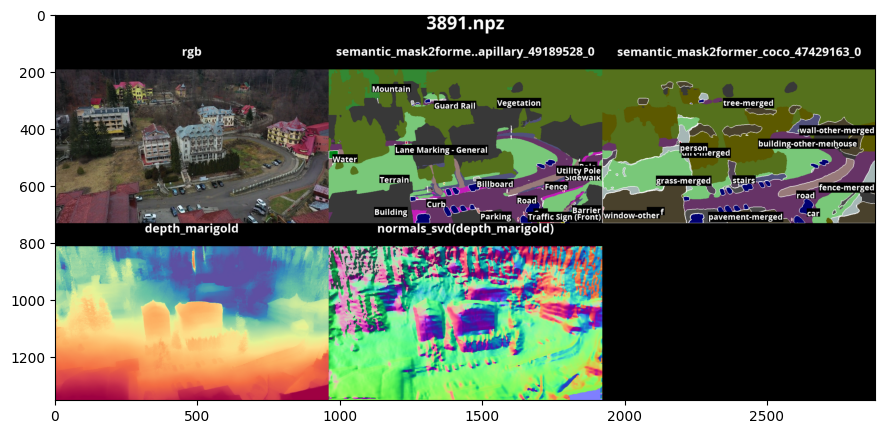

In [6]:
def plot_one(data: MultiTaskItem, title: str, order: list[str],
             name_to_task: dict[str, Representation]) -> np.ndarray:
    def vre_plot_fn(rgb: tr.Tensor, x: tr.Tensor, node: Representation) -> np.ndarray:
        node.data = ReprOut(rgb.cpu().detach().numpy()[None], MemoryData(x.cpu().detach().numpy()[None]), [0])
        return node.make_images(node.data)[0]
    img_data = {k: vre_plot_fn(data["rgb"].byte(), data[k], name_to_task[k]) for k in order}
    titles = [title if len(title) < 40 else f"{title[0:19]}..{title[-19:]}" for title in img_data]
    collage = collage_fn(list(img_data.values()), titles=titles, size_px=40)
    collage = image_add_title(collage, title, size_px=55, top_padding=110)
    return collage

task_names = ["rgb", "depth_marigold", "normals_svd(depth_marigold)", "opticalflow_rife",
              "semantic_mask2former_coco_47429163_0", "semantic_mask2former_mapillary_49189528_0"]
order = ["rgb", "semantic_mask2former_mapillary_49189528_0", "semantic_mask2former_coco_47429163_0",
            "depth_marigold", "normals_svd(depth_marigold)"]

task_types = {r.name: r for r in build_representations_from_cfg(cfg_path, get_vre_repository()) if r.name in task_names}

reader = MultiTaskDataset(vre_dir, task_names=task_names, task_types=task_types, handle_missing_data="fill_nan",
                          normalization="min_max", cache_task_stats=True, batch_size_stats=100)
orig_task_names = list(reader.task_types.keys())

print(reader)
print("== Shapes ==")
pprint(reader.data_shape)

data, name = reader[np.random.randint(0, len(reader))]
collage = plot_one(data, title=name, order=order, name_to_task=reader.name_to_task)
plt.figure(figsize=(15, 5))
plt.imshow(collage)
plt.show()

[2025-04-25T15:44:46 VRE-INFO] Adding a new task: 'semantic_mask2former_swin_mapillary_converted' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:46 VRE-INFO] Adding a new task: 'semantic_mask2former_r50_mapillary_converted' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'semantic_mask2former_swin_coco_converted' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'buildings' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'sky-and-water' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'transportation' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'containing' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'vegetation' (multitask_dataset.py:add_task:212)
[2025-04-25T15:44:47 VRE-INFO] Adding a new task: 'buildings(nearby)' (multitask_dataset.py:add_task:21

== Random loaded item ==


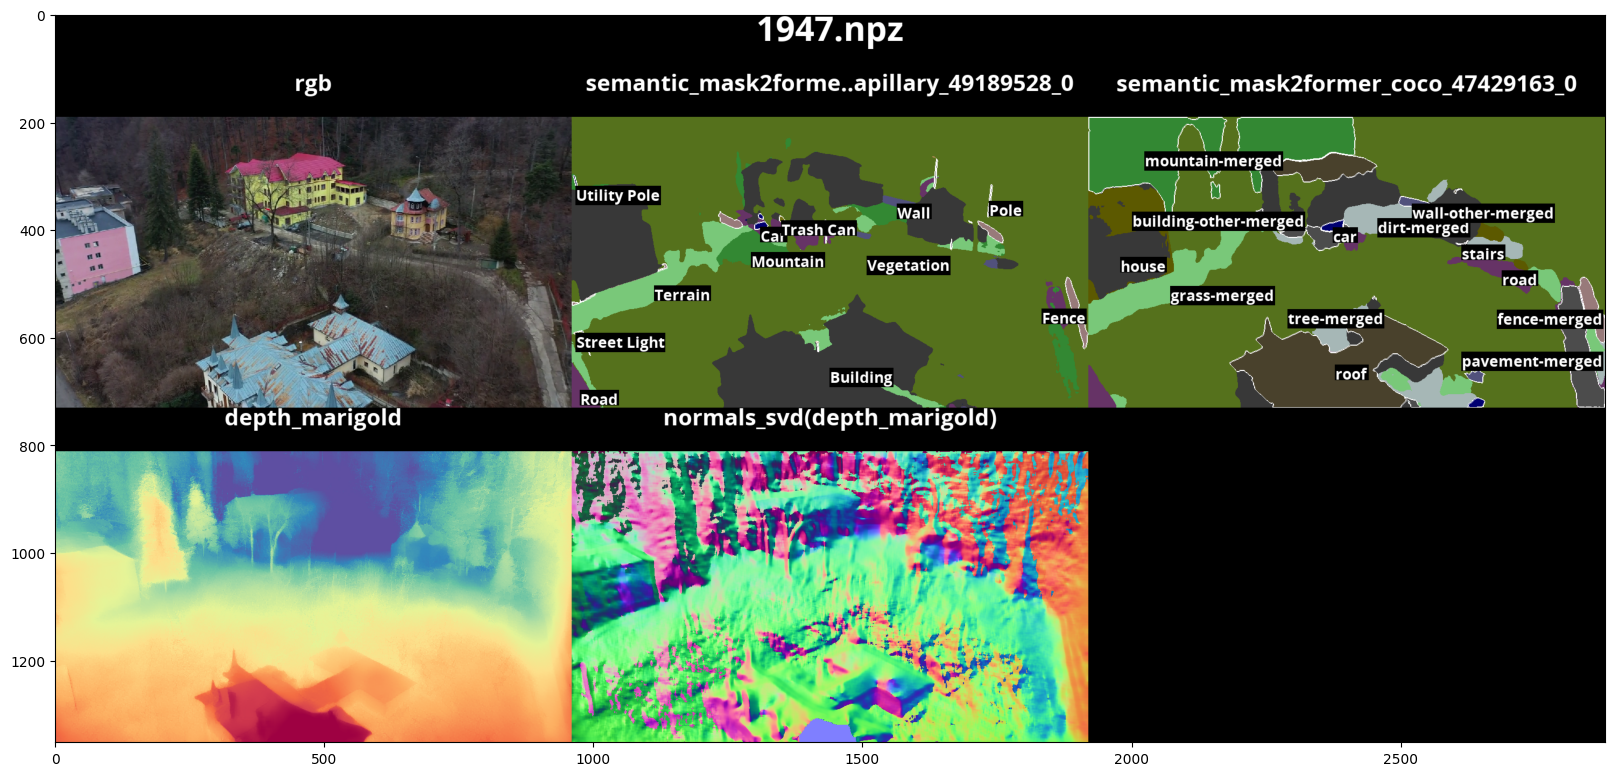

In [7]:
new_tasks = get_new_semantic_mapped_tasks(include_semantic_output=False)
for task_name in reader.task_names:
    if task_name not in orig_task_names and task_name in reader.task_names:
        reader.remove_task(task_name)
for new_task in new_tasks.values():
    reader.add_task(new_task, overwrite=True)

print("== Random loaded item ==")
ixs = np.random.permutation(range(len(reader))).tolist()
for ix in ixs:
    data, name = reader[ix] # get a random item
    plt.figure(figsize=(20, 10))
    plt.imshow(collage := plot_one(data, title=name, order=order, name_to_task=reader.name_to_task))
    plt.show()
    break